In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
import os
import matplotlib

from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
from statsmodels.stats.anova import anova_lm
from scipy.stats import shapiro
from statsmodels.formula.api import ols
# from statsmodels.formula.api import smf
# import statsmodels.api as sm

%matplotlib inline
sns.set(font="AppleGothic")
plt.rcParams['axes.unicode_minus']=False

# 상관분석
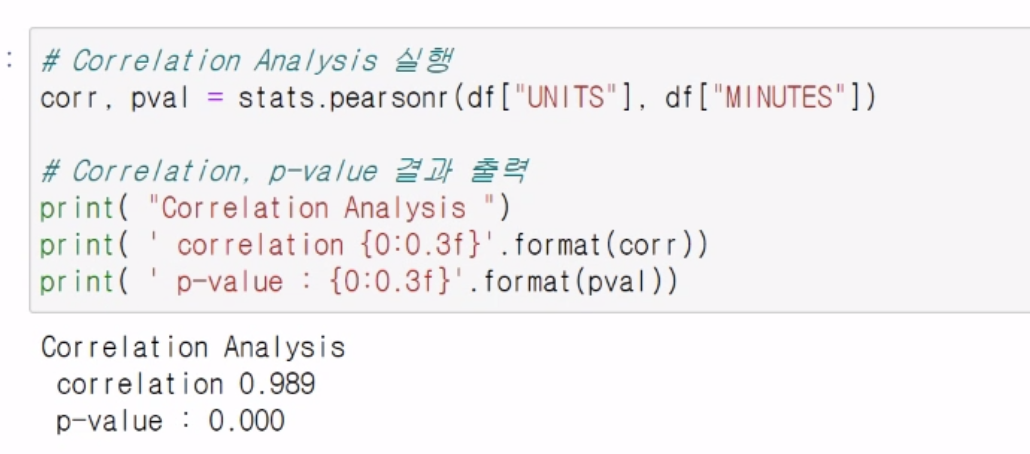

In [5]:
dir_ = '/Users/dasol/Documents/GitHub/Big-Data-Analysis/POSCO_classnote'
df = pd.read_csv(dir_+'/통계data/작업시간.csv', engine="python")
df.head()

,UNITS,MINUTES
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='UNITS', ylabel='MINUTES'>

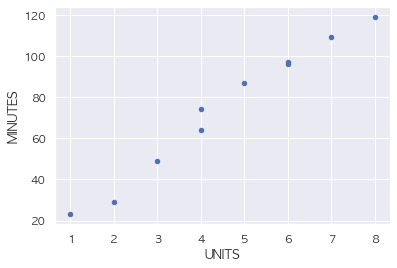

In [7]:
df.plot.scatter(x='UNITS', y='MINUTES')

In [12]:
df1 = df['UNITS']
df2 = df['MINUTES']
corr, pval = stats.pearsonr(df1, df2)

print('corr: {0:0.3f}'.format(corr))
print('p-value: {0:0.3f}'.format(pval))
# r!=0, 상관성이 있다., 
# 부품수리시간과 부품시간의 corr매우 크므로 상관성이 크다.

0.9892262536728126 5.818608669347627e-08
corr: 0.989
p-value: 0.000


## [실습] 상관분석
### 해석
p-value=0으로 매우 작기 때문에 H1가설 채택 => 상관관계가 있다.

강도와 온도의 상관계수는 음이며 -1에 가까우므로 음의 상관관계가 매우 큰 것으로 해석된다.

In [13]:
dir_ = '/Users/dasol/Documents/GitHub/Big-Data-Analysis/POSCO_classnote'
df = pd.read_csv(dir_+'/통계data/correlation.csv', engine="python")
df.head()

,strength,temp,Quantity,b_time,Oven_TMP
0,37.6,14,120.790646,0.798922,307.106574
1,38.6,15,99.643155,0.849020,318.178850
2,37.2,14,115.102395,0.816163,339.715122
3,36.4,16,114.640504,0.758266,341.174398
4,38.6,17,141.266536,0.815894,335.904402


In [14]:
df1 = df['strength']
df2 = df['temp']
corr, pval = stats.pearsonr(df1, df2)

print('corr: {0:0.3f}'.format(corr))
print('p-value: {0:0.3f}'.format(pval))

corr: -0.899
p-value: 0.000


# 회귀분석

In [15]:
from statsmodels.api import qqplot, add_constant


In [16]:
dir_ = '/Users/dasol/Documents/GitHub/Big-Data-Analysis/POSCO_classnote'
df = pd.read_csv(dir_+'/1 통계이해/부품수리시간.csv', engine="python")
df.head()

,UNITS,MINUTES
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


In [18]:
df.describe().round(3)

,UNITS,MINUTES
count,14.000,14.000
mean,6.000,97.214
std,2.961,46.217
min,1.000,23.000
25%,4.000,66.500
50%,6.000,96.500
75%,8.750,138.500
max,10.000,166.000


<AxesSubplot:xlabel='UNITS', ylabel='MINUTES'>

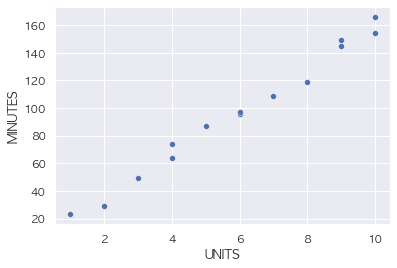

In [19]:
sns.scatterplot(data=df, x="UNITS", y='MINUTES')

In [20]:
# 상관관계 분석
df.corr(method='pearson').round(3)

,UNITS,MINUTES
UNITS,1.000,0.994
MINUTES,0.994,1.000


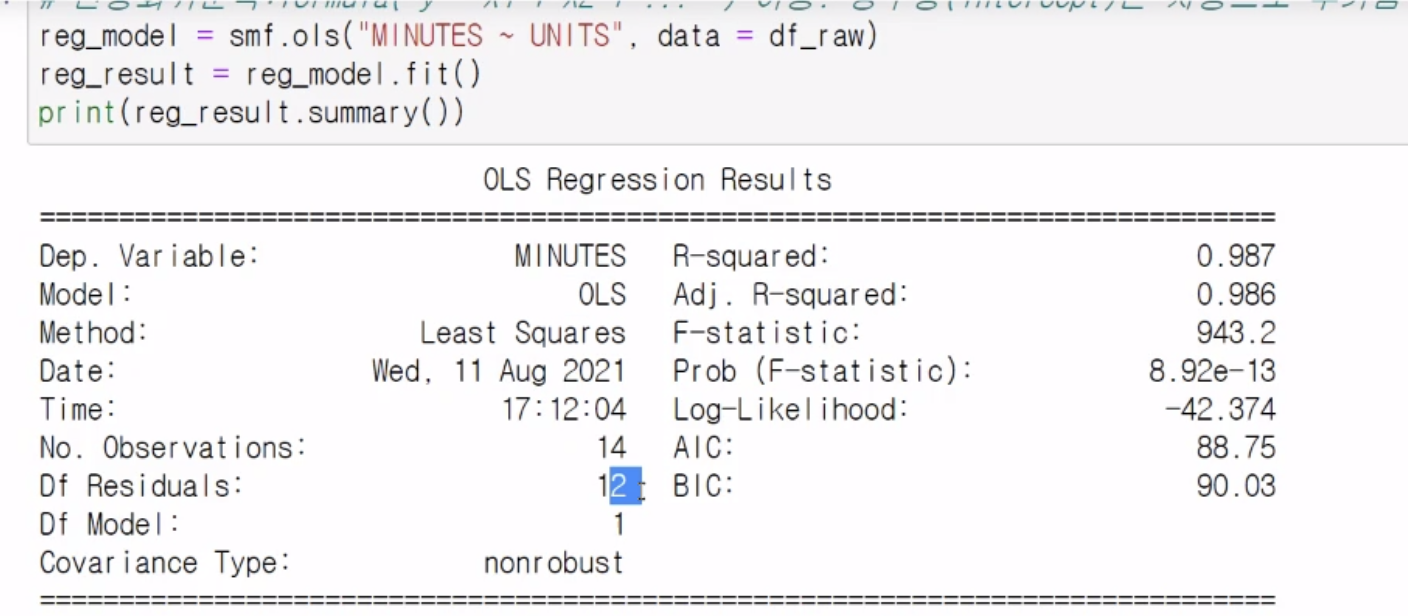
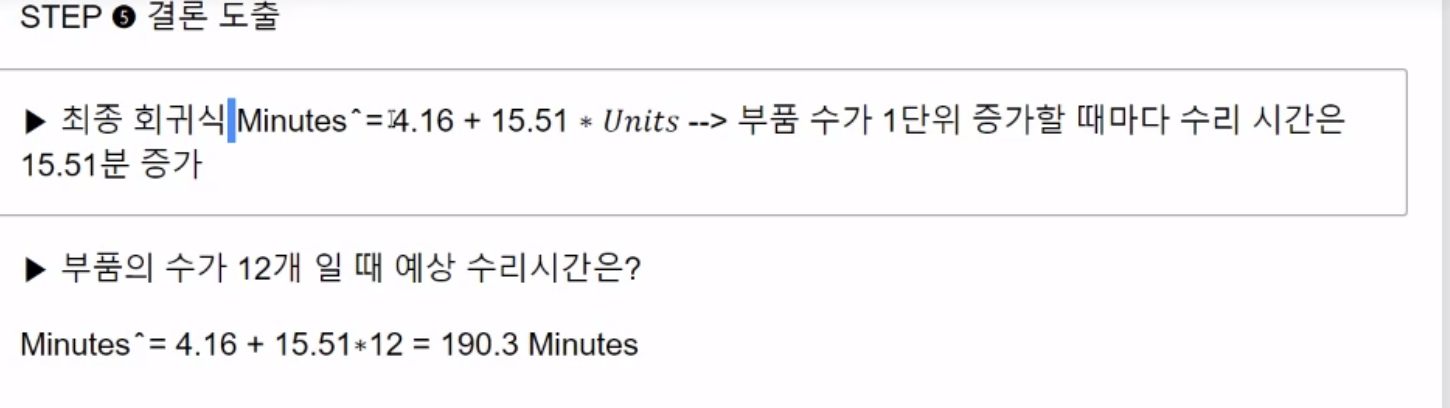

In [24]:

# r2 매우 높다.
# 상관계수 제곱하면 0.987skdhsek.
# f통계량 값에 해당하는 CDF ~0
# coef: 절편과 기울기
# Units coef값이 통계적으로 유의미하다.
# Durbin-wawtson(독립성): 2에 가까이 갔기 때문에 독립성이 있다.
# omnibus(정규성): 
reg_model = smf.ols('MINUTES ~ UNITS', data=df) # 중요) ordinary least squares
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                MINUTES   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     943.2
Date:                Wed, 11 Aug 2021   Prob (F-statistic):           8.92e-13
Time:                        17:18:50   Log-Likelihood:                -42.374
No. Observations:                  14   AIC:                             88.75
Df Residuals:                      12   BIC:                             90.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1617      3.355      1.240      0.2

/Users/dasol/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# 결론 도출
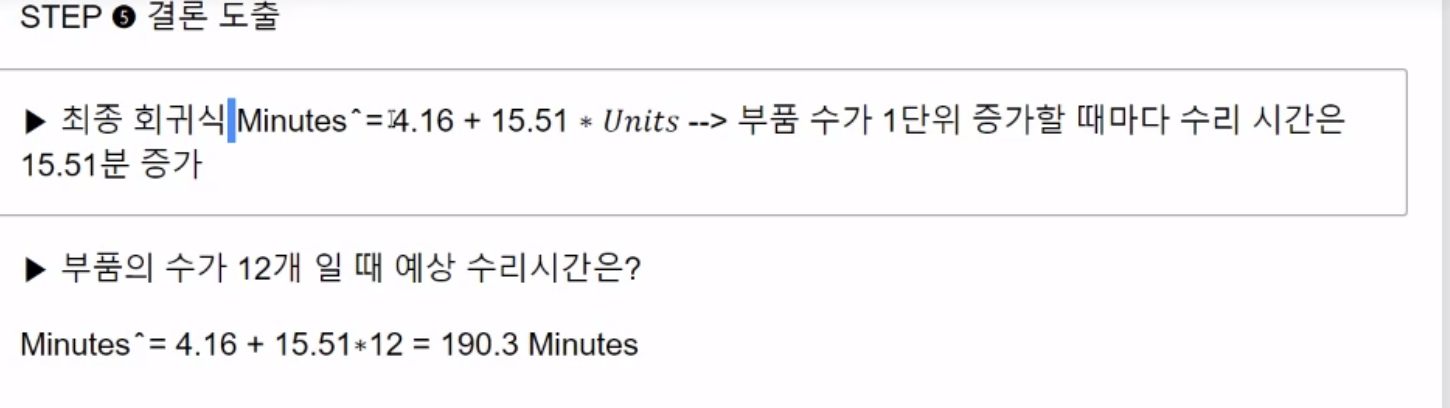